# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Auliya Afifah Adnan Hakim
- **Email:** [Input Email]
- **ID Dicoding:** [Input Username]

## Menentukan Pertanyaan Bisnis

- Bagaimana tren peminjaman sepeda dalam setahun?
- Bagaimana pengaruh cuaca terhadap jumlah peminjaman sepeda?
- Bagaimana perbedaan pola peminjaman sepeda antara hari biasa dan hari libur?
- Bagaimana pengaruh musim terhadap jumlah peminjaman sepeda?
- Pada jam berapa penyewaan sepeda mencapai tingkat permintaan tertinggi dan terendah?


## Import Semua Packages/Library yang Digunakan

In [2]:
# Import library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [4]:
# load tabel day
day_df = pd.read_csv('../data/day.csv')
day_df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'data\\day_.csv'

In [4]:
# load tabel hour
hour_df = pd.read_csv('../data/hour.csv')
hour_df.head()

,instant,dateday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1




- Tabel harian ("day_df") dan tabel per jam ("hour_df") dimulai dari 1 Januari 2011, dengan data harian menampilkan informasi per hari dan data per jam memberikan rincian setiap jam.

- Kedua dataset mencakup kolom untuk informasi tanggal dan waktu, kondisi cuaca (suhu, kelembaban, kecepatan angin), faktor lain seperti hari libur dan hari kerja, serta jumlah penyewaan sepeda (pengguna kasual, terdaftar, dan total).

### Assessing Data

In [5]:
# mengecek tipe data day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dateday     731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
# mengecek apakah ada missing values pada day_df
day_df.isna().sum()

instant       0
dateday       0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
# mengecek apakah ada duplicate data pada day_df
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [8]:
# mengecek keanehan pada ringkasan parameter statistik day_df
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
# mengecek tipe data hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dateday     17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
# mengecek apakah ada missing values pada hour_df
hour_df.isna().sum()

instant       0
dateday       0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
# mengecek apakah ada duplicate data pada hour_df
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [12]:
# mengecek keanehan pada ringkasan parameter statistik day_df
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


- terdapat beberapa data yang tidak sesuai tipe datanya (dateday : object)
- tidak ada missing value di hour_df dan day_df
- tidak ada data duplikat di hour_df dan day_df
- tidak ada keanehan di nilai statistik hour_df dan day_df

### Cleaning Data

In [13]:
# menghapus kolom yang tidak akan digunakan
for df in [day_df, hour_df]:
    df.drop(columns=['instant'], inplace=True)

In [14]:
# mengganti nama kolom agar lebih mudah dibaca
day_df.rename(columns={
    'dateday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'hum': 'humidity',
    'weathersit': 'weather',
    'cnt': 'count'
}, inplace=True)

hour_df.rename(columns={
    'dateday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'hum': 'humidity',
    'weathersit': 'weather',
    'cnt': 'count'
}, inplace=True)

In [15]:
# mengubah beberapa data angka menjadi keterangan
def transform_dataframe(df):
    df['season'] = df['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
    df['month'] = df['month'].replace({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 
                                       7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})
    df['weather'] = df['weather'].replace({1: 'Clear', 2: 'Cloudy', 3: 'Light rain/snow', 4: 'Heavy rain/snow'})
    df['weekday'] = df['weekday'].replace({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 
                                           4: 'Thursday', 5: 'Friday', 6: 'Saturday'})
    df['year'] = df['year'].replace({0: '2011', 1: '2012'})
    return df

day_df = transform_dataframe(day_df)
hour_df = transform_dataframe(hour_df)

In [16]:
# mengubah beberapa tipe data ke categorical
category_columns = ['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weather']
for df in [day_df, hour_df]:
    df[category_columns] = df[category_columns].astype('category')

In [17]:
# mengubah tipe data ke datetime
for df in [day_df, hour_df]:
    df['dateday'] = pd.to_datetime(df['dateday'])

In [18]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dateday     731 non-null    datetime64[ns]
 1   season      731 non-null    category      
 2   year        731 non-null    category      
 3   month       731 non-null    category      
 4   holiday     731 non-null    category      
 5   weekday     731 non-null    category      
 6   workingday  731 non-null    category      
 7   weather     731 non-null    category      
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  humidity    731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  count       731 non-null    int64         
dtypes: category(7), datetime64[ns](1), float64(4), int64(3)
memory usage: 52.2


Berdasarkan kebutuhan data saya melakukan beberapa cleaning
- Menghapus kolom yang tidak diperlukan yaitu 'instant', karena indeks tidak memberikan informasi tambahan yang berguna untuk analisis.
- Mengganti beberapa nama kolom agar lebih mudah dibaca
- Mengubah beberapa data angka menjadi keterangan, agar lebih mudah dipahami
- Mengubah beberapa tipe data menjadi category agar sesuai dengan tipe data yang dibutuhkan dalam analisis
- Mengubah tipe data 'dateday', menjadi datetime

## Exploratory Data Analysis (EDA)

### Explore data day_df

In [19]:
# Mengelompokkan penyewa sepeda berdasarkan bulan
day_df.groupby(by='month').agg({
    'count': ['max', 'min', 'mean', 'sum']
}).sort_values(('count', 'mean'), ascending=False)

C:\Users\My ASUS\AppData\Local\Temp\ipykernel_3784\3512791444.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='month').agg({


count                           
        max   min         mean     sum
month                                 
Jun    8120  3767  5772.366667  346342
Sep    8714  1842  5766.516667  345991
Aug    7865  1115  5664.419355  351194
Jul    8173  3285  5563.677419  344948
May    8294  2633  5349.774194  331686
Oct    8156    22  5199.225806  322352
Apr    7460   795  4484.900000  269094
Nov    6852  1495  4247.183333  254831
Mar    8362   605  3692.258065  228920
Dec    6606   441  3403.806452  211036
Feb    5062  1005  2655.298246  151352
Jan    4521   431  2176.338710  134933

Berdasarkan hasil, disimpulkan bahwa bulan yang memiliki rata-rata terbesar dan jumlah terbanyak adalah bulan Juni, sedangkan rata-rata terkecil dan jumlah terkecil adalah bulan Januari

In [20]:
#  Mengelompokkan penyewa sepeda berdasarkan musim
day_df.groupby(by='season').agg({
    'casual': 'mean',
    'registered': 'mean',
    'count': ['max', 'min', 'mean','sum']
}).sort_values(('count', 'sum'), ascending=False)

C:\Users\My ASUS\AppData\Local\Temp\ipykernel_3784\725545410.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='season').agg({


casual   registered count                            
               mean         mean   max   min         mean      sum
season                                                            
Fall    1202.611702  4441.691489  8714  1115  5644.303191  1061129
Summer  1106.097826  3886.233696  8362   795  4992.331522   918589
Winter   729.112360  3999.050562  8555    22  4728.162921   841613
Spring   334.928177  2269.204420  7836   431  2604.132597   471348

Berdasarkan hasil, disimpulkan bahwa musim yang paling banyak penyewa sepeda pada musim gugur (Fall), dan paling sedikit pada musim semi (Spring)

In [21]:
# Mengelompokkan penyewa sepeda berdasarkan tahun
day_df.groupby(by="year").agg({
    "registered": ['max', 'min', 'mean', 'sum'],
    "casual": ['max', 'min', 'mean', 'sum']
})

C:\Users\My ASUS\AppData\Local\Temp\ipykernel_3784\3236237494.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="year").agg({


registered                            casual                         
            max  min         mean      sum    max min         mean     sum
year                                                                      
2011       4614  416  2728.358904   995851   3065   9   677.402740  247252
2012       6946   20  4581.450820  1676811   3410   2  1018.483607  372765

Berdasarkan hasil, terjadi peningkatan signifikan dalam jumlah penyewaan sepeda dari tahun 2011 ke 2012, baik untuk pengguna terdaftar (registered) maupun pengguna kasual (casual). Ini terlihat dari nilai-nilai maksimum (max) dan total (sum) yang lebih tinggi di tahun 2012 dibandingkan dengan tahun 2011 untuk kedua kategori pengguna.
Terdapat perbedaan besar jumlah antara pengguna terdaftar (registered) dan pengguna kasual (casual), dimana pengguna registered lebih banyak daripada casual.

In [22]:
# Mengelompokkan penyewa sepeda berdasarkan 'workingday'
day_df.groupby(by='workingday').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

C:\Users\My ASUS\AppData\Local\Temp\ipykernel_3784\1413323633.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='workingday').agg({


count                           
             max  min         mean      sum
workingday                                 
0           8714  605  4330.168831  1000269
1           8362   22  4584.820000  2292410

Berdasarkan hasil, perbedaan antara hari kerja (workingday) dan bukan hari kerja (non-workingday) tidak terlalu besar dengan jumlah penyewaan sepeda terbesar jatuh kepada workingday dibandingkan dengan non-workingday

In [23]:
# Mengelompokkan penyewa sepeda berdasarkan 'holiday'
day_df.groupby(by='holiday').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

C:\Users\My ASUS\AppData\Local\Temp\ipykernel_3784\2355642583.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='holiday').agg({


count                            
          max   min         mean      sum
holiday                                  
0        8714    22  4527.104225  3214244
1        7403  1000  3735.000000    78435

In [ ]:
Berdasarkan hasil, dapat disimpulkan bahwa para penyewa sepeda lebih suka menyewa sepeda saat bukan hari libur (non-hodiday) dibandingkan pada saat hari libur (holiday)

### Explore data hour_df

In [24]:
# Mengelompokkan penyewa sepeda berdasarkan jam
hour_df.groupby(by="hr").agg({
    "count": ['max', 'min', 'mean', 'sum']
}).sort_values(('count', 'sum'), ascending=False)

count                        
     max min        mean     sum
hr                              
17   976  15  461.452055  336860
18   977  23  425.510989  309772
8    839   5  359.011004  261001
16   783  11  311.983562  227748
19   743  11  311.523352  226789
13   760  11  253.661180  184919
12   776   3  253.315934  184414
15   750   7  251.233196  183149
14   750  12  240.949246  175652
20   567  11  226.030220  164550
9    426  14  219.309491  159438
7    596   1  212.064649  154171
11   663  10  208.143054  151320
10   539   8  173.668501  126257
21   584   6  172.314560  125445
22   502   9  131.335165   95612
23   256   2   87.831044   63941
6    213   1   76.044138   55132
0    283   2   53.898072   39130
1    168   1   33.375691   24164
2    132   1   22.869930   16352
5     66   1   19.889819   14261
3     79   1   11.727403    8174
4     28   1    6.352941    4428

Berdasarkan hasil, dapat disimpulkan penyewaan sepeda terbanyak terjadi pada jam 17 sedangkan penyewaan sepeda yang paling sedikit pada jam 4.

In [25]:
# Mengelompokkan temp, hum, dan humidity berdasarkan jam
hour_df.groupby(by='hr').agg({
    'temp': ['max', 'min', 'mean'],
    'atemp': ['max', 'min', 'mean'],
    'humidity': ['max', 'min', 'mean']
})

temp                   atemp                   humidity                
     max   min      mean     max     min      mean      max   min      mean
hr                                                                         
0   0.82  0.04  0.467410  0.8333  0.0303  0.451105      1.0  0.00  0.691019
1   0.82  0.04  0.459365  0.7879  0.0000  0.443289      1.0  0.00  0.704213
2   0.82  0.02  0.454573  0.8030  0.0152  0.439184      1.0  0.00  0.716825
3   0.80  0.02  0.453113  0.7879  0.0152  0.438396      1.0  0.14  0.729785
4   0.78  0.02  0.446628  0.7576  0.0152  0.432549      1.0  0.15  0.742367
5   0.78  0.02  0.436123  0.7576  0.0455  0.423145      1.0  0.00  0.742929
6   0.80  0.02  0.432469  0.7879  0.0303  0.419376      1.0  0.00  0.744179
7   0.80  0.02  0.439092  0.8030  0.0152  0.425557      1.0  0.00  0.730908
8   0.84  0.02  0.454993  0.8485  0.0000  0.440272      1.0  0.00  0.702682
9   0.86  0.04  0.476726  0.8939  0.0303  0.458715      1.0  0.00  0.661692
10  0.92  0.04  0.500578  0.9242  0.0606  0.478139      1.0  0.00  0.616066
11  0.94  0.06  0.522613  0.8939  0.0758  0.497477      1.0  0.00  0.571431
12  0.96  0.06  0.540275  0.9545  0.0758  0.512903      1.0  0.00  0.536703
13  0.96  0.08  0.554733  0.9848  0.1061  0.525499      1.0  0.00  0.511591
14  0.96  0.10  0.565075  1.0000  0.1212  0.534188      1.0  0.00  0.496982
15  0.96  0.12  0.568615  0.9848  0.1212  0.536598      1.0  0.00  0.492126
16  1.00  0.12  0.564959  0.9242  0.0909  0.532460      1.0  0.00  0.495795
17  0.98  0.12  0.554575  0.9242  0.1061  0.523224      1.0  0.00  0.513438
18  0.96  0.08  0.541181  0.8939  0.0909  0.512736      1.0  0.00  0.535989
19  0.92  0.08  0.524176  0.9242  0.0909  0.499459      1.0  0.00  0.572445
20  0.92  0.06  0.508599  0.8939  0.0758  0.487221      1.0  0.00  0.601470
21  0.88  0.06  0.495302  0.8939  0.0758  0.476503      1.0  0.00  0.631538
22  0.84  0.06  0.484505  0.8636  0.0303  0.466535      1.0  0.00  0.653146
23  0.84  0.04  0.475027  0.8333  0.0455  0.458086      1.0  0.00  0.673269

Berdasarkan hasil, dapat disimpulkan suhu (temp dan atemp) cenderung meningkat dari pagi hingga siang hari, mencapai puncaknya sekitar jam 14-16, lalu menurun menjelang malam.
Kelembaban (humidity) umumnya lebih tinggi di malam dan pagi hari, kemudian menurun saat siang hari, dengan nilai terendah sekitar jam 14-16.
Terdapat variasi suhu dan kelembaban yang signifikan sepanjang hari, yang mungkin mempengaruhi pola penggunaan sepeda.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren peminjaman sepeda dalam setahun?

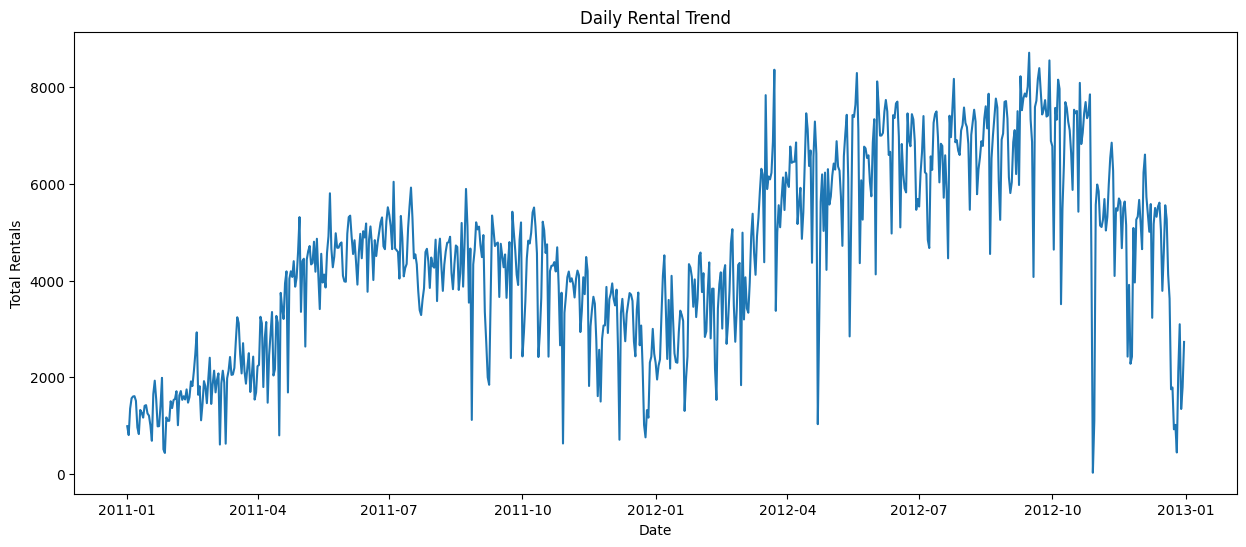

In [35]:
# Membuat visualisasi tren penyewaan sepeda harian dalam setahun
plt.figure(figsize=(15, 6))
plt.plot(day_df['dateday'], day_df['count'])
plt.title('Daily Rental Trend')
plt.xlabel('Date')
plt.ylabel('Total Rentals')
plt.show()

Berdasarkan visualisasi di atas menggunakan lineplot, dapat dilihat bahwa tren penyewaan sepeda harian menunjukkan pola yang fluktuatif namun cenderung meningkat dari tahun 2011 hingga awal 2013. Puncak penyewaan tertinggi terjadi pada pertengahan tahun 2012, dengan jumlah penyewaan mencapai lebih dari 8000 sepeda per hari. Sementara itu, titik terendah penyewaan terlihat pada awal tahun 2011 dan akhir tahun 2012, dengan jumlah penyewaan kurang dari 1000 sepeda per hari. Grafik juga menunjukkan adanya pola musiman yang jelas, di mana penyewaan cenderung meningkat pada bulan-bulan musim panas dan menurun pada bulan-bulan musim dingin.

C:\Users\My ASUS\AppData\Local\Temp\ipykernel_3784\330902799.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_summary = day_df.groupby(["month", "year"])["count"].sum().reset_index()


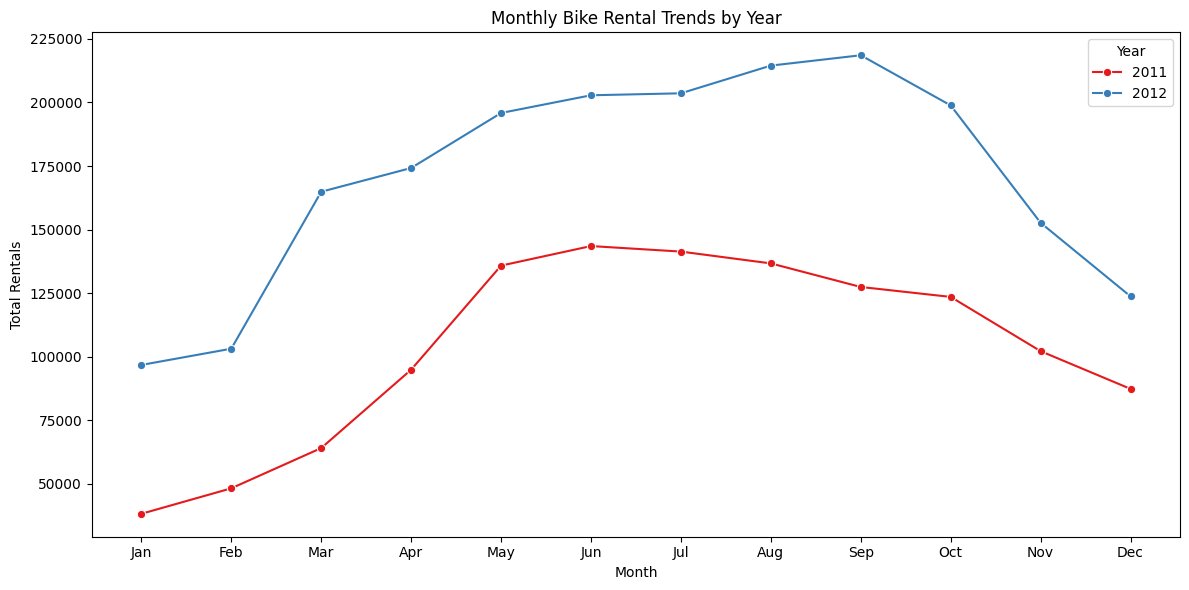

In [27]:
# Membuat visualisasi tren peminjaman sepeda bulanan pertahun
month_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
day_df['month'] = pd.Categorical(day_df['month'], categories=month_order, ordered=True)

monthly_summary = day_df.groupby(["month", "year"])["count"].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=monthly_summary,
    x="month",
    y="count",
    hue="year",
    palette="Set1",
    marker="o"
)

plt.title("Monthly Bike Rental Trends by Year")
plt.xlabel("Month")
plt.ylabel("Total Rentals")
plt.legend(title="Year", loc="upper right")
plt.tight_layout()
plt.show()

Berdasarkan visualisasi di atas menggunakan lineplot, dapat disimpulkan bahwa tahun 2012 (yang diwakili oleh garis biru) jelas menunjukkan jumlah penyewaan yang lebih tinggi dibandingkan tahun 2011 (garis merah) untuk setiap bulan dari Januari hingga Desember. Puncak penyewaan sepeda pada tahun 2012 terjadi pada bulan September, sementara bulan yang paling sepi terjadi pada bulan Januari. Sedangkan pada tahun 2011, puncak penyewaan sepeda tertinggi pada bulan Juni dan memiliki penyewaan tersepi pada bulan Januari. 

### Pertanyaan 2: Bagaimana pengaruh cuaca terhadap jumlah peminjaman sepeda?

C:\Users\My ASUS\AppData\Local\Temp\ipykernel_3784\1659587297.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_data = day_df.groupby('weather')['count'].mean().reset_index()
C:\Users\My ASUS\AppData\Local\Temp\ipykernel_3784\1659587297.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weather', y='count', data=weather_data, palette='Blues')


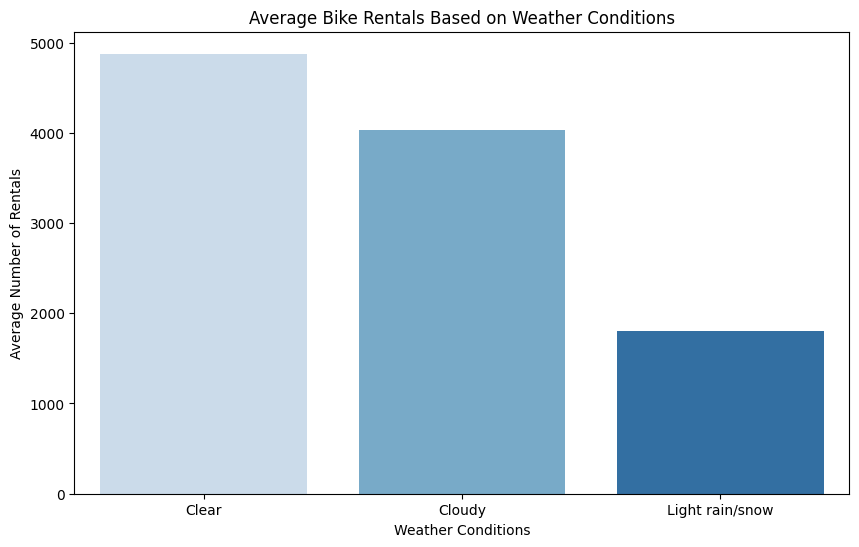

In [47]:
# Membuat visualisasi rata-rata peminjaman sepeda berdasarkan kondisi cuaca
weather_data = day_df.groupby('weather')['count'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='weather', y='count', data=weather_data, palette='Blues')
plt.title('Average Bike Rentals Based on Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Average Number of Rentals')
plt.show()


Berdasarkan visualisasi diatas, menggunakan boxplot dapat disimpulkan bahwa terdapat hubungan yang jelas antara kondisi cuaca dan penyewaan sepeda. Cuaca cerah menjadi kondisi yang paling diminati, diikuti oleh cuaca mendung, sementara kondisi bersalju atau hujan paling sedikit diminati.

### Pertanyaan 3: Bagaimana perbedaan pola peminjaman sepeda antara hari biasa dan hari libur?


C:\Users\My ASUS\AppData\Local\Temp\ipykernel_3784\734140814.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  working_day_data = day_df.groupby('workingday')['count'].mean().reset_index()
C:\Users\My ASUS\AppData\Local\Temp\ipykernel_3784\734140814.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, data=data, palette='Blues', ax=ax)
C:\Users\My ASUS\AppData\Local\Temp\ipykernel_3784\734140814.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(['Non-Working', 'Working'])
C:\Users\My ASUS\AppData\Local\Temp\ipykernel_3784\734140814.

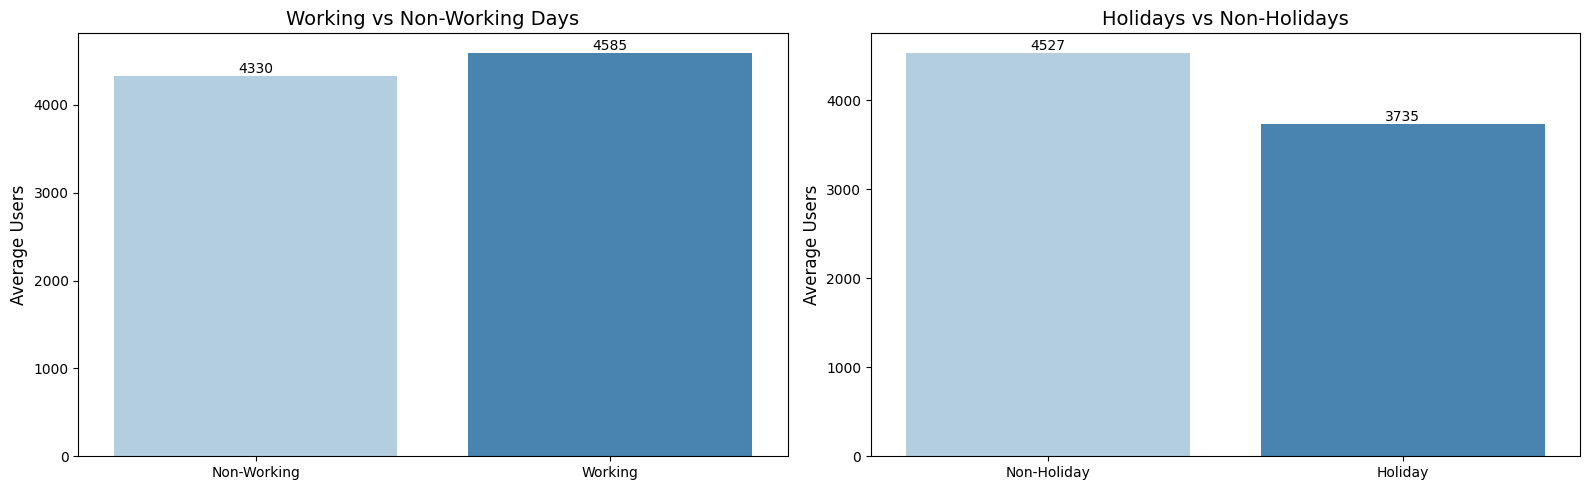

In [45]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

def create_bar_plot(data, x, y, ax, title):
    colors = [highlight_color if val == data[y].max() else base_color for val in data[y]]
    sns.barplot(x=x, y=y, data=data, palette='Blues', ax=ax)
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('')
    ax.set_ylabel('Average Users', fontsize=12)
    for i, v in enumerate(data[y]):
        ax.text(i, v, f'{v:.0f}', ha='center', va='bottom', fontsize=10)

# membuat visualisasi peminjaman sepeda berdasarkan hari kerja (workingday)
working_day_data = day_df.groupby('workingday')['count'].mean().reset_index()
create_bar_plot(working_day_data, 'workingday', 'count', ax1, 'Working vs Non-Working Days')
ax1.set_xticklabels(['Non-Working', 'Working'])

# membuat visualisasi peminjaman sepeda berdasrkan hari libur(holiday)
holiday_data = day_df.groupby('holiday')['count'].mean().reset_index()
create_bar_plot(holiday_data, 'holiday', 'count', ax2, 'Holidays vs Non-Holidays')
ax2.set_xticklabels(['Non-Holiday', 'Holiday'])

plt.tight_layout()
plt.show()

Berdasarkan visualisasi di atas, dapat dilihat perbedaan pola peminjaman sepeda antara hari biasa dan hari libur. Grafik batang menunjukkan bahwa Jumlah penyewa sepeda lebih banyak pada hari kerja (workingday) daripada akhir pekan (non-workingday). Jumlah penyewa sepeda lebih banyak pada hari biasa (non-holiday) dibandingkan hari libur (nasional).

C:\Users\My ASUS\AppData\Local\Temp\ipykernel_3784\3029539782.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly_pattern = hour_df.groupby(['hr', 'is_holiday'])['count'].mean().reset_index()


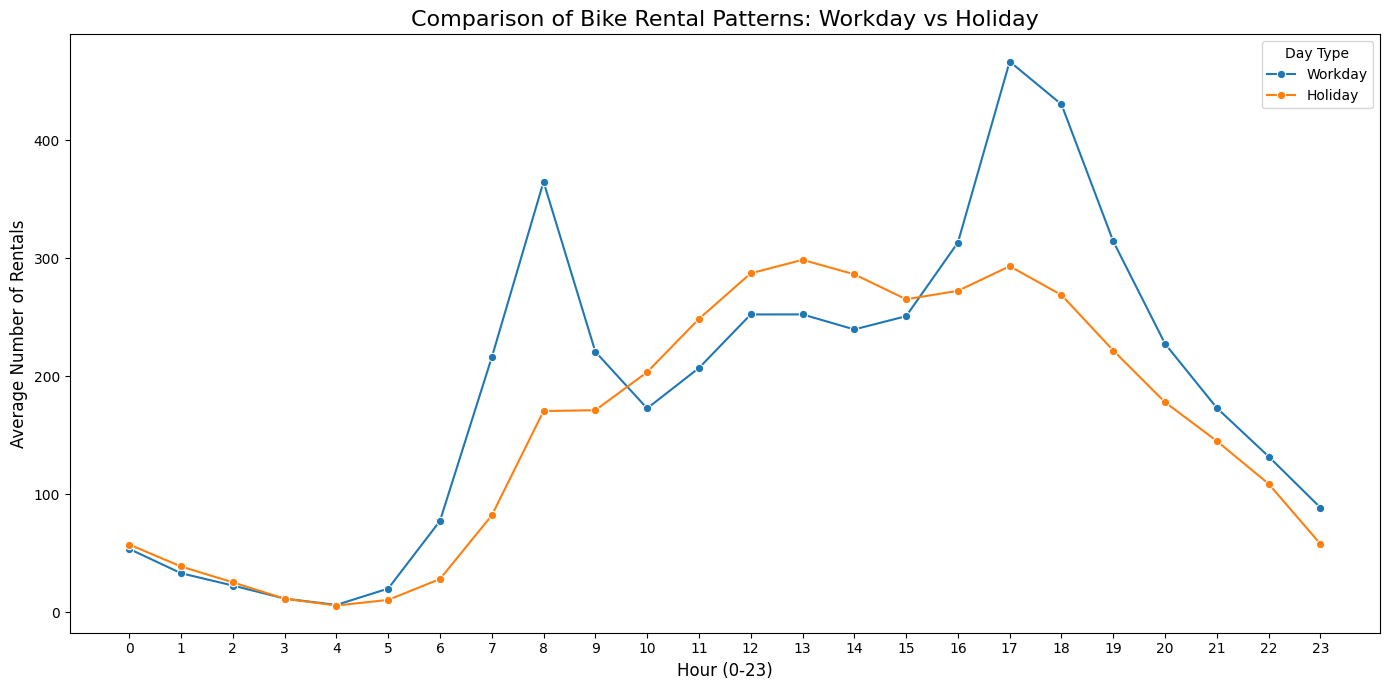

In [34]:
hour_df['is_holiday'] = hour_df['holiday'].map({0: 'Workday', 1: 'Holiday'})
hourly_pattern = hour_df.groupby(['hr', 'is_holiday'])['count'].mean().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(x='hr', y='count', hue='is_holiday', data=hourly_pattern, marker='o')

plt.title('Comparison of Bike Rental Patterns: Workday vs Holiday', fontsize=16)
plt.xlabel('Hour (0-23)', fontsize=12)
plt.ylabel('Average Number of Rentals', fontsize=12)
plt.xticks(range(0, 24))
plt.legend(title='Day Type', fontsize=10)

for day_type in ['Workday', 'Holiday']:
    data = hourly_pattern[hourly_pattern['is_holiday'] == day_type]
    max_count = data['count'].max()
    max_hour = data.loc[data['count'].idxmax(), 'hr']

plt.tight_layout()
plt.show()


Berdasarkan visualisasi diatas, grafik garis memperlihatkan pola harian yang berbeda. Pada hari kerja, terdapat dua puncak peminjaman yang jelas, yaitu pagi hari sekitar pukul 8 dan sore hari sekitar pukul 17-18, yang mencerminkan pola perjalanan pekerja. Sedangkan pada hari libur, pola peminjaman lebih merata sepanjang hari dengan satu puncak yang lebih landai di siang hari.

### Pertanyaan 4: Bagaimana pengaruh musim terhadap jumlah peminjaman sepeda?


C:\Users\My ASUS\AppData\Local\Temp\ipykernel_3784\1317296439.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_data = day_df.groupby('season')['count'].mean().reset_index()
C:\Users\My ASUS\AppData\Local\Temp\ipykernel_3784\1317296439.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='count', data=season_data, palette='Blues')


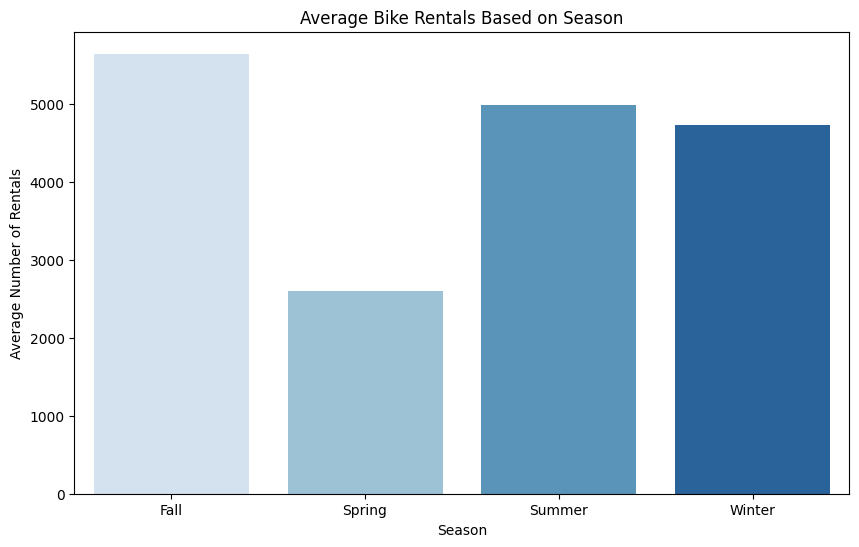

In [54]:
# Membuat visualisasi rata-rata peminjaman sepeda berdasarkan musim
season_data = day_df.groupby('season')['count'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='count', data=season_data, palette='Blues')
plt.title('Average Bike Rentals Based on Season')
plt.xlabel('Season')
plt.ylabel('Average Number of Rentals')
plt.show()



Berdasarkan visualisasi data menggunakan boxplot, dapat disimpulkan bahwa terdapat hubungan yang jelas antara musim dan penyewaan sepeda. Rata-rata penyewaan sepeda tertinggi terjadi pada musim Fall diikuti oleh Summer, sementara Spring mencatat jumlah penyewaan terendah.

### Pertanyaan 5: Pada jam berapa penyewaan sepeda mencapai tingkat permintaan tertinggi dan terendah?


C:\Users\My ASUS\AppData\Local\Temp\ipykernel_3784\2749337226.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hr', y='count', data=hourly_rentals, palette='Blues')


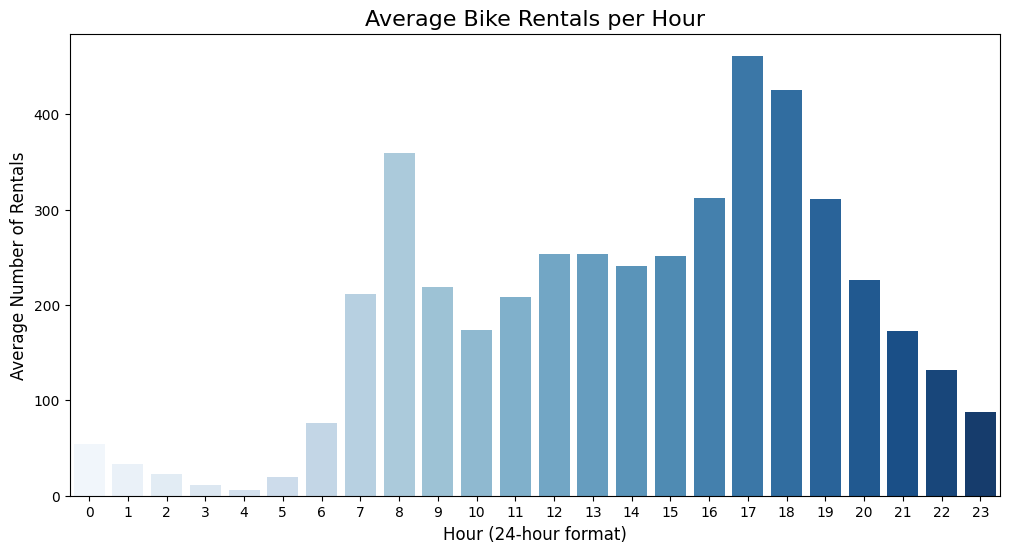

In [55]:
# Membuat visualisasi rata-rata penyewaan sepeda perjam
hourly_rentals = hour_df.groupby('hr')['count'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='hr', y='count', data=hourly_rentals, palette='Blues')
plt.title('Average Bike Rentals per Hour', fontsize=16)
plt.xlabel('Hour (24-hour format)', fontsize=12)
plt.ylabel('Average Number of Rentals', fontsize=12)
plt.xticks(range(0, 24))
plt.show()


Berdasarkan hasil visualisasi, penyewaan sepeda tertinggi terjadi pada pukul 17 dan setelah pukul 18 jumlah penyewaan menurun secara bertahap. Sebaliknya, penyewaan paling sedikit terjadi pada pukul 4.

C:\Users\My ASUS\AppData\Local\Temp\ipykernel_3784\2545144113.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="hr", y="count", data=hourly_rentals.head(5), palette='Blues', ax=ax1)
C:\Users\My ASUS\AppData\Local\Temp\ipykernel_3784\2545144113.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="hr", y="count", data=least_busy_hr, palette='Blues', ax=ax2)


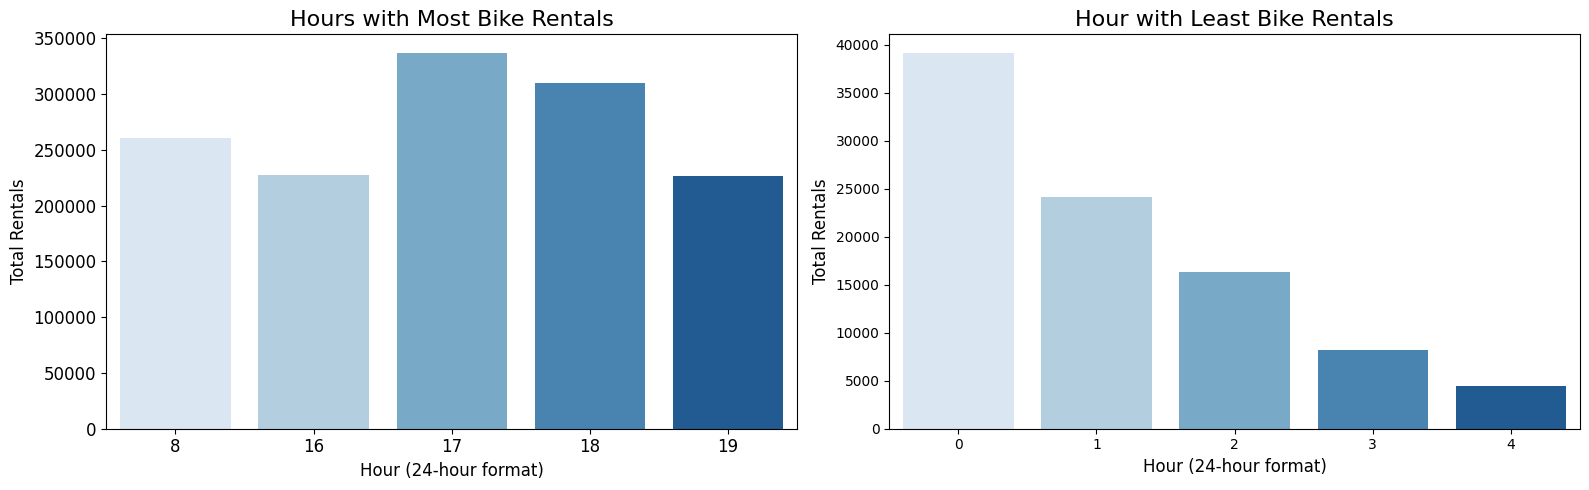

In [51]:
# Membuat visualisasi waktu dengan penyewa sepeda terbanyak dan terendah
hourly_rentals = hour_df.groupby("hr")['count'].sum().reset_index()
hourly_rentals = hourly_rentals.sort_values('count', ascending=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

sns.barplot(x="hr", y="count", data=hourly_rentals.head(5), palette='Blues', ax=ax1)
ax1.set_title("Hours with Most Bike Rentals", fontsize=16)
ax1.set_xlabel("Hour (24-hour format)", fontsize=12)
ax1.set_ylabel("Total Rentals", fontsize=12)
ax1.tick_params(axis='both', which='major', labelsize=12)

least_busy_hr = hourly_rentals.sort_values('hr').head(5)
sns.barplot(x="hr", y="count", data=least_busy_hr, palette='Blues', ax=ax2)
ax2.set_title("Hour with Least Bike Rentals", fontsize=16)
ax2.set_xlabel("Hour (24-hour format)", fontsize=12)
ax2.set_ylabel("Total Rentals", fontsize=12)
ax2.tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()
plt.show()


Berdasarkan visualisasi, grafik menunjukkan bahwa penyewaan sepeda tertinggi terjadi pada pukul 17. Sementara itu penyewaan paling rendah terjadi antara pukul 0 hingga 4, dengan titik terendah pada pukul 4.

## Conclusion

Pertanyaan :
1. Bagaimana tren peminjaman sepeda dalam setahun?
2. Bagaimana pengaruh cuaca terhadap jumlah peminjaman sepeda?
3. Bagaimana perbedaan pola peminjaman sepeda antara hari biasa dan hari libur?
4. Bagaimana pengaruh musim terhadap jumlah peminjaman sepeda?
5. Pada jam berapa penyewaan sepeda mencapai tingkat permintaan tertinggi dan terendah?

Conclution:
1. Berdasarkan visualisasi, tren peminjaman sepeda dalam setahun menunjukkan peningkatan dari tahun 2011 hingga akhir 2012. Puncak penyewaan tertinggi terjadi pada bulan September 2012, sementara titik terendah terlihat di awal tahun 2011 dan bulan Desember 2012.
2. Berdasarkan visualisasi, cuaca memiliki pengaruh signifikan terhadap jumlah peminjaman sepeda. Cuaca cerah menarik minat penyewa terbanyak, diikuti oleh cuaca mendung, sedangkan cuaca bersalju atau hujan menyebabkan peminjaman paling sedikit.
3. Berdasarkan visualisasi, peminjaman sepeda lebih tinggi pada hari biasa dibandingkan hari libur. Pada hari kerja, terdapat puncak peminjaman di pagi dan sore hari, sementara pada hari libur, peminjaman lebih merata sepanjang hari dengan puncak di siang hari.
4. Berdasarkan visualisasi, terdapat pengaruh signifikan antara musim dan jumlah peminjaman sepeda. Rata-rata penyewaan tertinggi terjadi pada musim Fall, diikuti oleh musim Summer, sedangkan musim Spring mencatat jumlah penyewaan terendah.
5. Berdasarkan hasil visualisasi, penyewaan sepeda mencapai tingkat permintaan tertinggi pada pukul 17, sedangkan penyewaan terendah terjadi pada pukul 4.

## Analisis Lanjutan (Clustering)

Clustering dilakukan untuk mengelompokkan data penyewaan sepeda berdasarkan tingkat kelembaban. Tujuannya adalah untuk memahami bagaimana kondisi kelembaban yang berbeda mempengaruhi jumlah penyewaan sepeda.

Proses Clustering dilakukan dengan 

1. Membagi Data kelembaban menjadi 4 kategori: Dry, Normal, Humid, dan Very Humid.
2. Menjumlah penyewaan sepeda dihitung untuk setiap kategori kelembaban.

In [56]:
day_df['humidity_category'] = pd.cut(day_df['humidity'], 
                                     bins=[0, 0.25, 0.5, 0.75, 1], 
                                     labels=['Dry', 'Normal', 'Humid', 'Very Humid'])

summary = day_df.groupby('humidity_category')['count'].agg(['sum'])
summary = summary.rename(columns={'sum': 'total_rentals'})
print(summary)


                   total_rentals
humidity_category               
Dry                         1635
Normal                    623361
Humid                    2122305
Very Humid                544755


C:\Users\My ASUS\AppData\Local\Temp\ipykernel_3784\1765737669.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = day_df.groupby('humidity_category')['count'].agg(['sum'])


Dari clustering ini, kita dapat menyimpulkan bahwa kondisi kelembaban memiliki pengaruh signifikan terhadap pola penyewaan sepeda. Penyewaan sepeda paling banyak terjadi pada kondisi lembab, sementara kondisi kering justru memiliki jumlah penyewaan yang sangat rendah. Hal ini mungkin mengindikasikan bahwa pengguna lebih memilih untuk menyewa sepeda pada kondisi cuaca yang tidak terlalu kering namun juga tidak terlalu basah.

In [5]:
!pipreqs .

INFO: Not scanning for jupyter notebooks.
